<a href="https://colab.research.google.com/github/ichencyj/AI_ML/blob/main/classification0606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()#函式要加小括號
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
# 整理資料/資料預處理
# pandas兩個型態: DataFrame(表格, 2D)/Series(一行/一列, 1D)
# 資料的量到底要多少才夠?
# 看你的問題的難易度來決定(簡單: 少一點 難: 多一點) 欄位數量(少: 簡單 多: 難)
# ML: 千-萬筆  DL: 萬-十萬筆資料
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()#函式要加小括號
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]
#df.to_csv("iris.csv", encoding="utf-8", index=False)
df

In [7]:
# 切成兩份
# 資料整理/預處理: pandas 機器學習: numpy
import numpy as np
# 型態: numpy array
# np.array(df["ans"])
# drop "ans", df->  轉array ; input x, output y, 
x = np.array(df.drop(["ans"], axis=1)) 
y = np.array(df["ans"])

In [8]:
# 大部分人會9:1/8:2切
from sklearn.model_selection import train_test_split
# [90%x, 10%x, 90%y, 10%y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)#創造一個空的模型, clf分類器
clf.fit(x_train, y_train) #餵他吃資料（訓練的input, 訓練的output)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [48, 43, 44]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 87\nvalue = [0, 43, 44]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.19\nsamples = 47\nvalue = [0, 42, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]')]

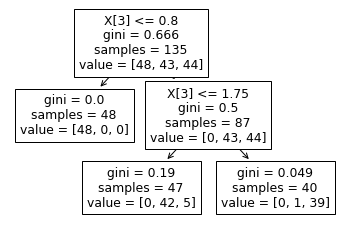

In [10]:
from sklearn.tree import plot_tree
plot_tree(clf)#畫決策樹

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [48, 43, 44]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 87\nvalue = [0, 43, 44]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.19\nsamples = 47\nvalue = [0, 42, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = virginica')]

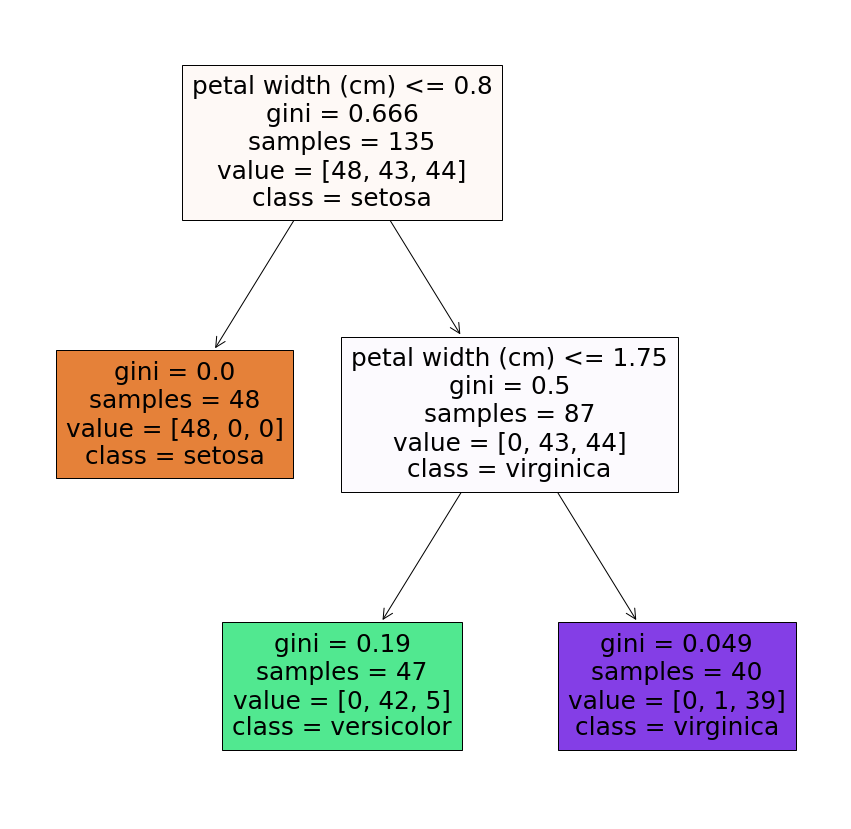

In [11]:
import matplotlib.pyplot as plt #把畫布變大
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))#figsize(高, 寬)
plot_tree(clf, 
     feature_names=iris["feature_names"],
     class_names=iris["target_names"],
     filled=True)

In [17]:
# 驗證模型表現得如何
clf.predict(x_test)

array([1, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2])

In [19]:
# 驗證模型表現得如何(回頭調整參數)
# 選擇評估標準(分類): 1. 正確率  2. f1 score(imbalanced不平衡的資料集 ex.titanic)
from sklearn.metrics import accuracy_score #所有的評估標準放在 sklearn.metrics
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

1.0